<a href="https://colab.research.google.com/github/amanuelR/Natural-Image-Classifier/blob/main/456Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krisnakieng","key":"edf937332d8fdb7e8539684496adad8f"}'}

In [ ]:
mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle

In [ ]:
! kaggle datasets download -d prasunroy/natural-images

100% 342M/342M [00:15<00:00, 24.9MB/s]
100% 342M/342M [00:15<00:00, 22.9MB/s]


In [ ]:
! unzip natural-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: natural_images/cat/cat_0204.jpg  
  inflating: natural_images/cat/cat_0205.jpg  
  inflating: natural_images/cat/cat_0206.jpg  
  inflating: natural_images/cat/cat_0207.jpg  
  inflating: natural_images/cat/cat_0208.jpg  
  inflating: natural_images/cat/cat_0209.jpg  
  inflating: natural_images/cat/cat_0210.jpg  
  inflating: natural_images/cat/cat_0211.jpg  
  inflating: natural_images/cat/cat_0212.jpg  
  inflating: natural_images/cat/cat_0213.jpg  
  inflating: natural_images/cat/cat_0214.jpg  
  inflating: natural_images/cat/cat_0215.jpg  
  inflating: natural_images/cat/cat_0216.jpg  
  inflating: natural_images/cat/cat_0217.jpg  
  inflating: natural_images/cat/cat_0218.jpg  
  inflating: natural_images/cat/cat_0219.jpg  
  inflating: natural_images/cat/cat_0220.jpg  
  inflating: natural_images/cat/cat_0221.jpg  
  inflating: natural_images/cat/cat_0222.jpg  
  inflating: natural_images/cat/cat_0223.jpg  
  inflati

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.python.keras import regularizers
from keras import optimizers, metrics, models
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout

In [ ]:
#defining how the data is split into batch size and resizing all the images to be the same 
data_dir ='./natural_images'
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
#defining the training dataset 
train_ds = keras.preprocessing.image_dataset_from_directory(
                                                              data_dir,
                                                              validation_split=0.3,
                                                              subset="training",
                                                              seed=123,
                                                              label_mode='categorical',
                                                              image_size=(img_height, img_width),
                                                              batch_size=batch_size
                                                            )

Found 6899 files belonging to 8 classes.
Using 4830 files for training.


In [ ]:
#defining the validation dataset 
validation_ds = keras.preprocessing.image_dataset_from_directory(
                                                            data_dir,
                                                            validation_split=0.3,
                                                            subset="validation",
                                                            seed=123,
                                                            label_mode='categorical',
                                                            image_size=(img_height, img_width),
                                                            batch_size=batch_size
                                                          )

Found 6899 files belonging to 8 classes.
Using 2069 files for validation.


In [ ]:
#splitting the validation dataset to test_ds and val_ds 
validation_batches = tf.data.experimental.cardinality(validation_ds)
test_ds = validation_ds.take((2 * validation_batches)//3)
val_ds = validation_ds.skip((2 * validation_batches)//3)

In [ ]:
#displays all the possible classes in this test
class_names = train_ds.class_names
print(class_names)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [ ]:
#Test 1 of a basic pre-trained model using ResNet50 using a fully-connected layer of 64 neurons and relu for activation
model = Sequential()
transfered_model = keras.applications.ResNet50(
                                                  include_top=False,
                                                 input_shape=(180,180,3),
                                                 pooling='max',
                                                 classes=8,
                                                 weights='imagenet')
for layer in transfered_model.layers:
  layer.trainable=False,

model.add(transfered_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
#Displays the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 23,719,368
Trainable params: 23,666,248
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
#Displays accuracy and loss over 5 epochs
model.compile( optimizer='Adam',
               loss="categorical_crossentropy",
               metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
151/151 [==============================] - 47s 276ms/step - loss: 0.4019 - accuracy: 0.8766 - val_loss: 6.3367 - val_accuracy: 0.5743
Epoch 2/5
151/151 [==============================] - 41s 268ms/step - loss: 0.2243 - accuracy: 0.9230 - val_loss: 17.9496 - val_accuracy: 0.5224
Epoch 3/5
151/151 [==============================] - 41s 268ms/step - loss: 0.2610 - accuracy: 0.9201 - val_loss: 0.5423 - val_accuracy: 0.8326
Epoch 4/5
151/151 [==============================] - 41s 267ms/step - loss: 0.1142 - accuracy: 0.9613 - val_loss: 0.3070 - val_accuracy: 0.8990
Epoch 5/5
151/151 [==============================] - 41s 268ms/step - loss: 0.0720 - accuracy: 0.9760 - val_loss: 0.1944 - val_accuracy: 0.9365


In [ ]:
#Displays the accuracy 
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print("Testing Accuracy : " , test_acc)

43/43 - 3s - loss: 0.2076 - accuracy: 0.9375 - 3s/epoch - 80ms/step
Testing Accuracy :  0.9375


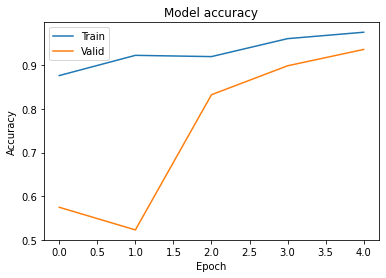

In [ ]:
#Displays the accuracies in a graph 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

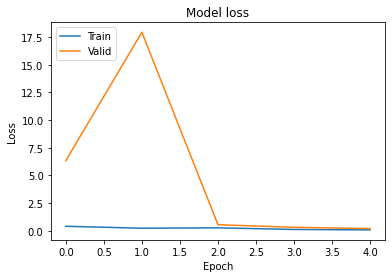

In [ ]:
#Displays the losses in a graph 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

<ipython-input-22-ffc62c953045>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


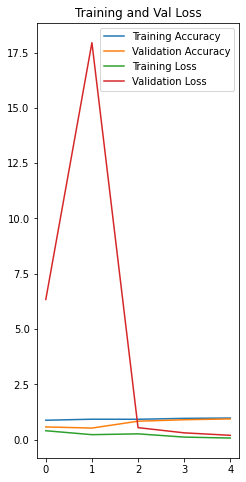

In [ ]:
#Combines the two graphs above into one to show the differences
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Val Accuracy')

plt.subplot(1, 2, 1)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Val Loss')
plt.show()

1/1 [==============================] - 2s 2s/step
Predicted Name:  airplane
Accuracy:  100.0


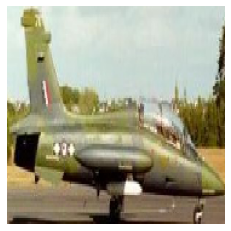

In [ ]:
#Loaded a downloaded image to see the model's accuracy 
from keras.utils.image_utils import load_img
import numpy as np

image_path = 'airplane.jpeg'
image = load_img(image_path, target_size=(180,180,3))

frame = np.asarray(image)
frame = np.expand_dims(frame, axis=0)
result = model.predict(frame)

dic_res = {}
for i in range(8):
  dic_res[result[0][i]] = class_names[i]

res = result[0]
res.sort()
res = res[::-1]
prob = res[:3]

prob_res = []
class_res = []

for i in range(3):
  prob_res.append((prob[i]*100).round(2))
  class_res.append(dic_res[prob[i]])

print("Predicted Name: ", class_res[0])
print("Accuracy: ", prob_res[0])
plt.imshow(image, cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
#Test 2 using one extra fully connected layer at 128 neurons 
model = Sequential()
transfered_model = keras.applications.ResNet50(
                                                  include_top=False,
                                                 input_shape=(180,180,3),
                                                 pooling='max',
                                                 classes=8,
                                                 weights='imagenet')
for layer in transfered_model.layers:
  layer.trainable=False,

model.add(transfered_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_11 (Flatten)        (None, 2048)              0         
                                                                 
 dense_26 (Dense)            (None, 128)               262272    
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 8)                 520       
                                                                 
Total params: 23,858,760
Trainable params: 23,805,640
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile( optimizer='Adam',
               loss="categorical_crossentropy",
               metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
151/151 [==============================] - 48s 274ms/step - loss: 0.7132 - accuracy: 0.8551 - val_loss: 53.1186 - val_accuracy: 0.3232
Epoch 2/10
151/151 [==============================] - 41s 267ms/step - loss: 0.5546 - accuracy: 0.8820 - val_loss: 5.0856 - val_accuracy: 0.7374
Epoch 3/10
151/151 [==============================] - 40s 265ms/step - loss: 0.2093 - accuracy: 0.9371 - val_loss: 0.1583 - val_accuracy: 0.9466
Epoch 4/10
151/151 [==============================] - 41s 267ms/step - loss: 0.1341 - accuracy: 0.9596 - val_loss: 4.3551 - val_accuracy: 0.6075
Epoch 5/10
151/151 [==============================] - 41s 267ms/step - loss: 0.0696 - accuracy: 0.9764 - val_loss: 0.0983 - val_accuracy: 0.9654
Epoch 6/10
151/151 [==============================] - 41s 267ms/step - loss: 0.0354 - accuracy: 0.9882 - val_loss: 0.2531 - val_accuracy: 0.9351
Epoch 7/10
151/151 [==============================] - 41s 268ms/step - loss: 0.0540 - accuracy: 0.9826 - val_loss: 3.7310 - val_a

In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print("Testing Accuracy : " , test_acc)

43/43 - 3s - loss: 0.2516 - accuracy: 0.9353 - 3s/epoch - 81ms/step
Testing Accuracy :  0.9353197813034058


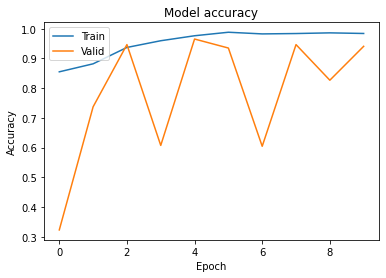

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

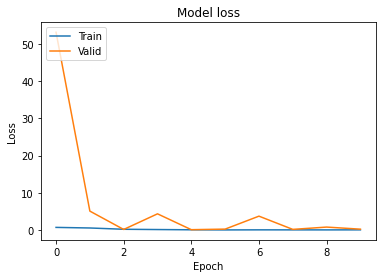

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

<ipython-input-137-3a9e130b446f>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


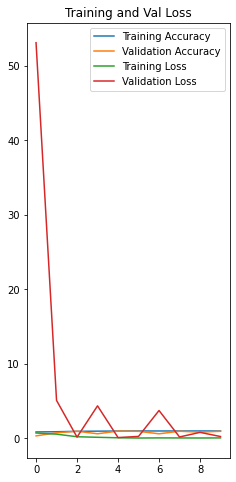

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Val Accuracy')

plt.subplot(1, 2, 1)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Val Loss')
plt.show()

In [ ]:
#Test 3 using another fully connected layer at 128 neurons and a dropout 
model = Sequential()
transfered_model = keras.applications.ResNet50(
                                                  include_top=False,
                                                 input_shape=(180,180,3),
                                                 pooling='max',
                                                 classes=8,
                                                 weights='imagenet')
for layer in transfered_model.layers:
  layer.trainable=False,

model.add(transfered_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 23,851,016
Trainable params: 23,797,896
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile( optimizer='Adam',
               loss="categorical_crossentropy",
               metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
151/151 [==============================] - 47s 273ms/step - loss: 1.2738 - accuracy: 0.7638 - val_loss: 2.1739 - val_accuracy: 0.7201
Epoch 2/10
151/151 [==============================] - 40s 265ms/step - loss: 0.4072 - accuracy: 0.8863 - val_loss: 1.2646 - val_accuracy: 0.7504
Epoch 3/10
151/151 [==============================] - 42s 279ms/step - loss: 0.5110 - accuracy: 0.8613 - val_loss: 3.7002 - val_accuracy: 0.2049
Epoch 4/10
151/151 [==============================] - 40s 266ms/step - loss: 0.4424 - accuracy: 0.8640 - val_loss: 1.6487 - val_accuracy: 0.6638
Epoch 5/10
151/151 [==============================] - 40s 265ms/step - loss: 0.2646 - accuracy: 0.9184 - val_loss: 0.3894 - val_accuracy: 0.8701
Epoch 6/10
151/151 [==============================] - 40s 266ms/step - loss: 0.2012 - accuracy: 0.9404 - val_loss: 1.4545 - val_accuracy: 0.8066
Epoch 7/10
151/151 [==============================] - 40s 265ms/step - loss: 0.2334 - accuracy: 0.9290 - val_loss: 0.1463 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print("Loss Accuracy : " , test_loss)
print("Testing Accuracy : " , test_acc)

43/43 - 3s - loss: 0.2144 - accuracy: 0.9462 - 3s/epoch - 80ms/step
Loss Accuracy :  0.21441532671451569
Testing Accuracy :  0.9462209343910217


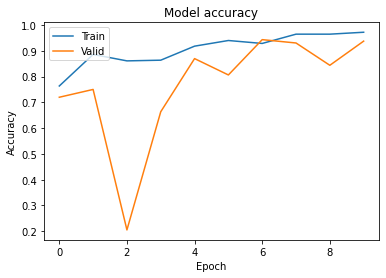

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

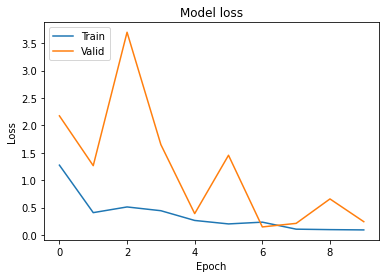

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

<ipython-input-106-3a9e130b446f>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


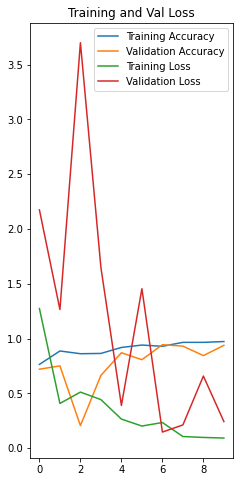

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Val Accuracy')

plt.subplot(1, 2, 1)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Val Loss')
plt.show()

In [ ]:
#Bonus Test using batch normalizaton and dropout
model = Sequential()
transfered_model = keras.applications.ResNet50(
                                                  include_top=False,
                                                 input_shape=(180,180,3),
                                                 pooling='max',
                                                 classes=8,
                                                 weights='imagenet')
for layer in transfered_model.layers:
  layer.trainable=False,

model.add(transfered_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_13 (Flatten)        (None, 2048)              0         
                                                                 
 batch_normalization_30 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_43 (Dense)            (None, 128)               262272    
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_31 (Bat  (None, 128)              512       
 chNormalization)                                    

In [ ]:
model.compile( optimizer='Adam',
               loss="categorical_crossentropy",
               metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
151/151 [==============================] - 47s 273ms/step - loss: 0.0551 - accuracy: 0.9863 - val_loss: 0.3034 - val_accuracy: 0.9278
Epoch 2/10
151/151 [==============================] - 41s 271ms/step - loss: 0.0538 - accuracy: 0.9863 - val_loss: 0.1632 - val_accuracy: 0.9553
Epoch 3/10
151/151 [==============================] - 40s 265ms/step - loss: 0.0333 - accuracy: 0.9905 - val_loss: 0.5560 - val_accuracy: 0.8456
Epoch 4/10
151/151 [==============================] - 40s 264ms/step - loss: 0.0421 - accuracy: 0.9884 - val_loss: 0.2922 - val_accuracy: 0.9278
Epoch 5/10
151/151 [==============================] - 40s 264ms/step - loss: 0.0603 - accuracy: 0.9841 - val_loss: 0.9355 - val_accuracy: 0.7778
Epoch 6/10
151/151 [==============================] - 40s 265ms/step - loss: 0.0804 - accuracy: 0.9791 - val_loss: 0.2554 - val_accuracy: 0.9250
Epoch 7/10
151/151 [==============================] - 40s 264ms/step - loss: 0.0395 - accuracy: 0.9892 - val_loss: 0.1457 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print("Testing Loss : ", test_loss)
print("Testing Accuracy : " , test_acc)

43/43 - 3s - loss: 0.2198 - accuracy: 0.9440 - 3s/epoch - 80ms/step
Testing Loss :  0.21981701254844666
Testing Accuracy :  0.9440407156944275


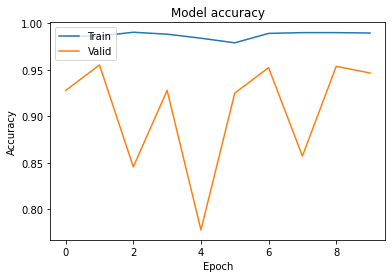

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

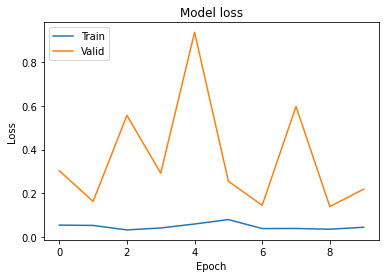

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

<ipython-input-109-3a9e130b446f>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


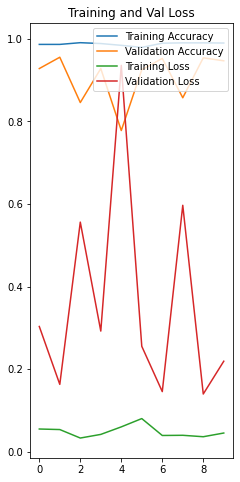

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Val Accuracy')

plt.subplot(1, 2, 1)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Val Loss')
plt.show()